1945.4004429747008

array([ 0.4970875 , -0.22685375,  0.1818464 ])

array([ 1.        , -1.46032316,  0.56926011])

array([ 0.])

4003.4267613999054

array([ 0.50010158, -0.2499656 ,  0.12468478])

array([ 1.        , -1.38527947,  0.63999798])

array([ 0.])

6000.3110987598247

array([ 0.50034066, -0.25015016,  0.12485291])

array([ 1.        , -1.13137712,  0.64005922])

array([ 0.])

7998.0856368913301

array([ 0.49970758, -0.2512389 ,  0.12608856])

array([ 1.        , -0.80112181,  0.64123943])

array([ 0.])

9995.1320344019732

array([ 0.4997883 , -0.25120241,  0.12614414])

array([ 1.        , -0.41550199,  0.64125504])

array([ 0.])

11998.285387692569

array([ 0.50004687, -0.25049175,  0.12523714])

array([  1.00000000e+00,  -3.59301718e-04,   6.40692245e-01])

array([ 0.])

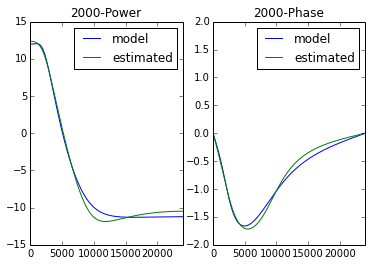

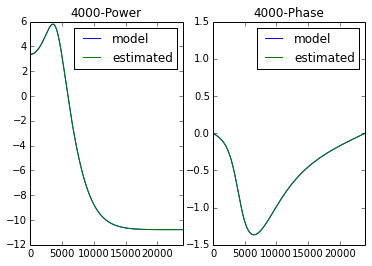

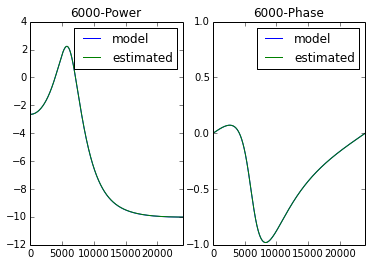

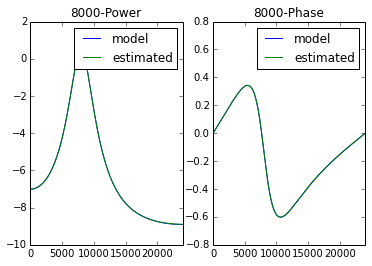

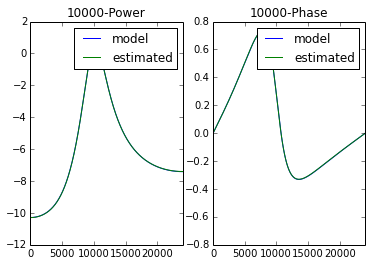

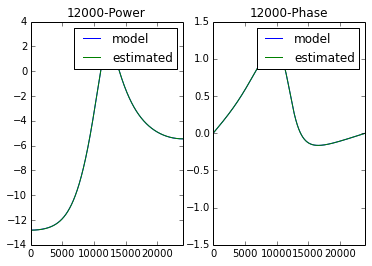

In [13]:
%matplotlib inline
from IPython.display import display
from scipy import signal as dsp
from matplotlib.pylab import *
L = 48000
x = zeros(L)
y = zeros(L)
d = zeros(L)
e = zeros(L)
a = zeros(3)
b = zeros(3)
c = zeros(1)
a[0] = 1
b[0] = 1
dady = zeros((L, len(a)))
dbdy = zeros((L, len(b)))
dcdy = zeros((L, len(c)))
eps = 0.001

for f in [2000, 4000, 6000, 8000, 10000, 12000][::1]:
    t = array(range(L))/float(L)
    x = normal(0, 1, L)
    r = 2 * pi * f / L
    R = 0.8
    ma = [0.5, -0.25, 0.125]
    mb = [1, -2*R*cos(r), R**2]
    G = array(map(lambda k: R**k,range(len(b))))
    d = dsp.lfilter(ma, mb, x+normal(0, 0.01, L))+normal(0, 0.01, L)
#    d = .1 * sin( 2 * pi * f * t ) + 
    for t in range(max(len(a), len(b))+2, L):
        y[t] = c
        if 0 < len(a):
            y[t] += dot(a[0:], x[t-0:t-len(a):-1])
        
        if 1 < len(b):
            y[t] -= dot(b[1:], y[t-1:t-len(b):-1])
        
        y[t] = y[t]
        e[t] = d[t] - y[t]
        
        if 0 < len(a):
            dady[t, 0:] =   x[t-0:t-len(a):-1] - dot(b[1:], dady[t-1:t-len(b):-1,0:])
            a[0:] = a[0:] + eps * e[t] * dady[t,0:]
        
        if 1 < len(b):
            dbdy[t, 1:] = - y[t-1:t-len(b):-1] - dot(b[1:], dbdy[t-1:t-len(b):-1,1:])
            b[1:] = b[1:] + eps * e[t] * dbdy[t,1:]

        if 0 < len(c):
            dcdy[t, 0:] =                      - dot(b[1:], dcdy[t-1:t-len(b):-1,0:])
            c[0:] = c[0:] + eps * e[t] * dcdy[t,0:]
        
    figure()
    
    subplot(1,2,1)
    
    A=zeros(L)
    B=zeros(L)
    A[0:len(ma)] = ma
    B[0:len(mb)] = mb
    plot(20*log10(abs(fft(A)/fft(B))), label='model')
    xlim((0, L/2))
    
    A=zeros(L)
    B=zeros(L)
    A[0:len(a)] = a
    B[0:len(b)] = b
    plot(20*log10(abs(fft(A)/fft(B))), label='estimated')
    xlim((0, L/2))
    
    legend()
    title(str(f)+'-Power')
    
    subplot(1,2,2)
    
    A=zeros(L)
    B=zeros(L)
    A[0:len(ma)] = ma
    B[0:len(mb)] = mb
    plot(imag(log(fft(A)/fft(B))), label='model')
    xlim((0, L/2))
    
    A=zeros(L)
    B=zeros(L)
    A[0:len(a)] = a
    B[0:len(b)] = b
    plot(imag(log(fft(A)/fft(B))), label='estimated')
    xlim((0, L/2))
    
    legend()
    title(str(f)+'-Phase')

    try:
        q = roots(b)
        display(arctan2(q[0].imag, q[0].real)/pi*L/2)
        display(a, b, c)
    except:
        pass
    
figure(1)
legend(loc=1)
figure(2)
legend(loc=1)


